BloomTech Data Science

*Unit 2, Sprint 1, Module 2*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [2]:
import pandas as pd 
import numpy as np 
import re

In [120]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    # create bianary columns for east and west streets
    df['street_address'] = df['street_address'].fillna('')
    west = []
    east = []
    for value in df['street_address']:
      if ('East' in value) or (' E ' in value) or ('east' in value) or ('E-' in value):
        east.append(1)
        west.append(0)
      elif ('West' in value) or (' W ' in value) or ('west' in value):
        east.append(0)
        west.append(1)
      else:
        east.append(0)
        west.append(0)
    df['west'] = west
    df['east'] = east
    # cast interest level to numeric 
    df['interest_level'] = df['interest_level'].replace({'low':1, 'medium':2, 'high':3})
    # create columns for dates 
    df['created'] = pd.to_datetime(df['created'])
    # df['year'] = df['created'].dt.year
    df['month'] = df['created'].dt.month
    df['day'] = df['created'].dt.day
    # # drop useless columns
    df = df.drop(['description', 'display_address', 'street_address', 'created'], axis=1)
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [121]:
df = wrangle(filepath)

**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [127]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.
pd.set_option('display.max_columns', None)
df.head()

,bathrooms,bedrooms,latitude,longitude,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,west,east,month,day
0,1.5,3,40.7145,-73.9425,3000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,24
1,1.0,2,40.7947,-73.9667,5465,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,12
2,1.0,1,40.7388,-74.0018,2850,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,17
3,1.0,1,40.7539,-73.9677,3275,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,18
4,1.0,4,40.8241,-73.9493,3350,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,28


In [128]:
df.isnull().sum()

bathrooms               0
bedrooms                0
latitude                0
longitude               0
price                   0
interest_level          0
elevator                0
cats_allowed            0
hardwood_floors         0
dogs_allowed            0
doorman                 0
dishwasher              0
no_fee                  0
laundry_in_building     0
fitness_center          0
pre-war                 0
laundry_in_unit         0
roof_deck               0
outdoor_space           0
dining_room             0
high_speed_internet     0
balcony                 0
swimming_pool           0
new_construction        0
terrace                 0
exclusive               0
loft                    0
garden_patio            0
wheelchair_access       0
common_outdoor_space    0
west                    0
east                    0
month                   0
day                     0
dtype: int64

In [129]:
corrs = df.corr()
corrs

,bathrooms,bedrooms,latitude,longitude,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,west,east,month,day
bathrooms,1.000000,0.524082,0.013407,-0.020099,0.687296,-0.072246,0.132882,0.021475,0.096922,0.024539,0.157173,0.172230,0.129547,-0.013202,0.148334,-0.016214,0.209366,0.102113,0.144450,0.233038,0.089073,0.136990,0.113315,0.066826,0.140767,-0.001944,0.014260,0.096283,0.066940,-0.003403,0.003692,0.029614,-0.000452,0.010458
bedrooms,0.524082,1.000000,0.003490,0.055117,0.535503,0.040735,-0.024821,-0.011173,0.096420,-0.009750,-0.047562,0.152102,0.163000,0.008558,0.013150,0.001420,0.151790,0.045451,0.124912,0.189415,0.061006,0.097772,0.033441,0.000907,0.099149,-0.014880,-0.107341,0.070760,0.012306,0.003234,-0.031957,-0.011580,0.014331,0.005032
latitude,0.013407,0.003490,1.000000,0.329185,-0.036286,-0.046203,-0.010523,-0.029808,0.018653,-0.030954,-0.043393,-0.020612,-0.026788,-0.041635,-0.108455,0.026802,-0.044339,-0.063198,-0.079919,0.017146,-0.030969,0.016877,0.027020,-0.056093,0.006466,-0.060054,-0.015650,-0.000589,-0.068330,-0.117199,0.299331,0.100499,0.012899,0.005167
longitude,-0.020099,0.055117,0.329185,1.000000,-0.251004,0.059222,-0.189836,-0.058475,-0.108493,-0.070329,-0.275734,-0.169220,-0.088033,-0.044562,-0.254960,0.000196,-0.130139,-0.161466,-0.098595,-0.024793,-0.125635,-0.035474,-0.075046,-0.108001,-0.049016,0.046755,-0.060018,-0.029846,-0.063635,-0.102955,-0.211466,0.157698,0.010717,0.002835
price,0.687296,0.535503,-0.036286,-0.251004,1.000000,-0.203596,0.207169,0.051453,0.101503,0.060401,0.276215,0.223899,0.132240,-0.019417,0.228775,-0.029122,0.271195,0.122929,0.142146,0.242911,0.090269,0.139140,0.134513,0.071431,0.145973,-0.013251,0.007100,0.103672,0.072517,0.011517,0.035482,0.024888,0.009466,0.018234
interest_level,-0.072246,0.040735,-0.046203,0.059222,-0.203596,1.000000,-0.008542,-0.057777,0.118992,-0.064214,-0.078467,0.064014,0.139567,0.100112,-0.042343,-0.038278,0.015665,0.014348,0.071750,0.044167,0.041725,0.027028,-0.001108,0.015816,0.028811,0.016218,0.020238,0.029311,0.011676,0.029864,-0.036389,-0.014551,-0.005012,-0.036061
elevator,0.132882,-0.024821,-0.010523,-0.189836,0.207169,-0.008542,1.000000,0.033347,0.270831,0.034833,0.614558,0.349832,0.227895,0.141097,0.431070,-0.097015,0.134158,0.332028,0.204343,0.200591,0.277666,0.168081,0.183664,0.184178,0.135329,0.025895,0.054918,0.084056,0.155396,0.114882,0.096076,-0.005865,-0.009841,-0.007992
cats_allowed,0.021475,-0.011173,-0.029808,-0.058475,0.051453,-0.057777,0.033347,1.000000,-0.177633,0.937245,0.088480,-0.047880,-0.024052,0.105644,0.126886,0.047500,-0.008827,0.027590,0.066713,-0.022404,0.077759,0.019979,0.009704,0.042710,0.006152,0.031414,-0.037966,0.006690,0.039656,0.104496,0.081746,-0.103282,0.006935,-0.002448
hardwood_floors,0.096922,0.096420,0.018653,-0.108493,0.101503,0.118992,0.270831,-0.177633,1.000000,-0.185663,0.205119,0.634983,0.342971,-0.144728,0.167510,0.013435,0.360716,0.278727,0.188913,0.317281,0.237935,0.178089,0.170589,0.187635,0.181005,-0.194436,0.116572,0.161751,0.124829,-0.120489,0.026145,0.105287,-0.010922,-0.006113
dogs_allowed,0.024539,-0.009750,-0.030954,-0.070329,0.060401,-0.064214,0.034833,0.937245,-0.185663,1.000000,0.095434,-0.043839,-0.011414,0.093035,0.131521,0.051610,0.002510,0.034104,0.067859,-0.016154,0.089425,0.024472,0.009675,0.055655,0.005219,0.032729,-0.041014,0.009229,0.048123,0.106071,0.085849,-0.114665,0.007475,-0.002359


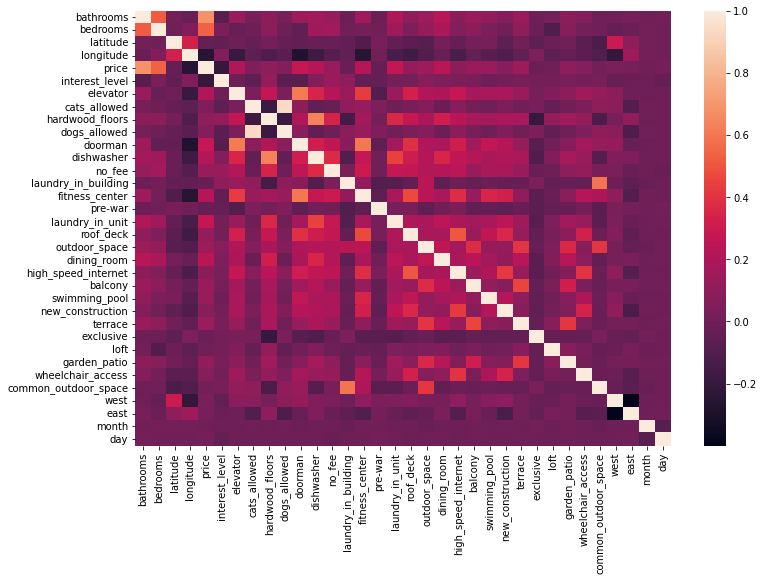

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corrs);

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [132]:
X = df.drop('price', axis=1)
y = df['price']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [145]:
X_train, y_train = X[X['month'] == (4 or 5)].reset_index(drop=True), df[df['month'] == (4 or 5)]['price'].reset_index(drop=True)
X_test, y_test = X[X['month'] == 6].reset_index(drop=True), df[df['month'] == 6]['price'].reset_index(drop=True)

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [149]:
# create a list of predicted values
train_mean = y_train.mean()
y_pred = [train_mean] * len(y_test)

In [162]:
diff = y_pred - y_test
baseline_mae = diff.abs().mean()
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1189.6596848403256


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [155]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)

LinearRegression()

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [163]:
training_diffs = model.predict(X_train) - y_train
testing_diffs = model.predict(X_test) - y_test

In [164]:
training_mae = training_diffs.abs().mean()
test_mae = testing_diffs.abs().mean()

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 671.1515251536587
Test MAE: 670.4606025784218


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [169]:
training_r2 = 1 - sum(training_diffs**2)/sum(diff**2)
test_r2 = 1 - sum(testing_diffs**2)/sum(diff**2)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6478509818075195
Test MAE: 0.6485041880823066


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [172]:
import plotly.express as px

fig = px.bar(x=X_test.columns, y=model.coef_)
fig.show()